# I am writing a markdown because this module forces me to

In [1]:
import numpy as np
import pandas as pd

In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = ['Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv')
print(dete_survey.head(4))
print(tafe_survey.head(4))

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   

   Role Start Date         Position Classification              Region  \
0           2004.0   Public Servant        A01-A04      Central Office   
1              NaN   Public Servant        AO5-AO7      Central Office   
2           2011.0  Schools Officer            NaN      Central Office   
3           2006.0          Teacher        Primary  Central Queensland   

                       Business Unit    Employment Status  ...   \
0  Corporate Strategy and Peformance  Permanent Full-time  ...    
1  Corporate Strategy and Peformance  Permanent Full-time  ...    
2               Education Queensland  Permanent Full-time  ...    
3    

In [7]:
print(dete_survey.info())
print(dete_survey['Aboriginal'].value_counts(dropna=False))
print(dete_survey['Torres Strait'].value_counts(dropna=False))
print(dete_survey['South Sea'].value_counts(dropna=False))
print(dete_survey['Disability'].value_counts(dropna=False))
print(dete_survey['NESB'].value_counts(dropna=False))
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

1. The **last 5 columns** of dete survey contains mainly nulls so probably do not contain any usefull information. 
2. Some of the other columns also have NaN values
3. The columns of tafe survey need to be renamed and the binary YES/NO questions should be converted to True/False for easier evaluation


In [8]:
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66], axis = 1)

We drop the columns which just try to explain the reason for leaving, we are just interested in whether they were satisfied with the job or not. This information is already available from the columns of the dataframe

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [12]:
new_names = {'Record ID':'id', 'CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(new_names, inplace = True, axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

In [13]:
print(dete_survey_updated.head(5))
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [15]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [40]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']
print(dete_resignations.head())
print(tafe_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


For the moment the plan is to focus only on the **Resignation** subset of the data, so we have chosen the portion of the data where the reason to leave contained the string *Resignation*

In [41]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [43]:
print(dete_resignations['cease_date'].value_counts().sort_values())
print(dete_resignations['dete_start_date'].value_counts().sort_values())
print(tafe_resignations['cease_date'].value_counts().sort_values())

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64
2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64


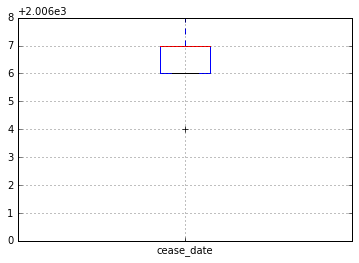

In [52]:
%matplotlib inline 
dete_resignations.boxplot(column='cease_date')

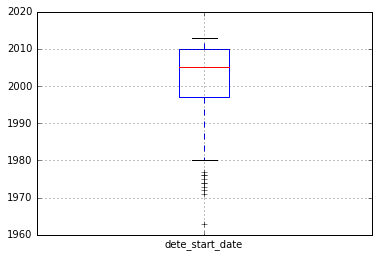

In [53]:
dete_resignations.boxplot(column='dete_start_date')

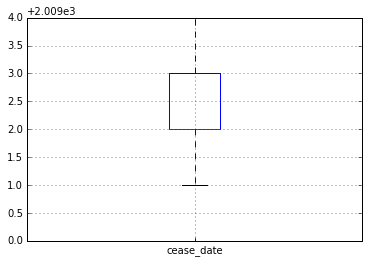

In [57]:
tafe_resignations.boxplot(column='cease_date')

In [61]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


# Creating a new column of number of years in service by looking at the start date and the end date

In [63]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [69]:
def update_vals(val):
    if pd.isnull(val):
        return val
    if val == '-':
        return False
    return True
tafe_resignations['dissatisfied'] = tafe_resignations[[ 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis =1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
imp_cols = [     'job_dissatisfaction',   'dissatisfaction_with_the_department',
    'physical_work_environment',    'lack_of_recognition',    'lack_of_job_security',
    'work_location',    'employment_conditions',    'work_life_balance',    'workload']

dete_resignations['dissatisfied'] = dete_resignations[imp_cols].any(axis =1, skipna = False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [74]:
dete_resignations_up = dete_resignations.copy()

In [75]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [76]:
combined_updated = combined.dropna(thresh=500, axis = 1).copy()

In [85]:
combined_updated[ 'institute_service_extr'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_extr'] = combined_updated['institute_service_extr'].astype('float')
combined_updated['institute_service_extr'].value_counts(dropna=False).sort_values()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



 31.0      1
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 33.0      1
 49.0      1
 38.0      1
 34.0      1
 41.0      1
 28.0      2
 25.0      2
 30.0      2
 36.0      2
 26.0      2
 19.0      3
 32.0      3
 39.0      3
 21.0      3
 24.0      4
 23.0      4
 18.0      5
 16.0      5
 12.0      6
 14.0      6
 17.0      6
 10.0      6
 22.0      6
 15.0      7
 8.0       8
 13.0      8
 2.0      14
 9.0      14
 4.0      16
 20.0     17
 6.0      17
 0.0      20
 11.0     30
 7.0      34
 5.0      56
 3.0      83
NaN       88
 1.0     159
Name: institute_service_extr, dtype: int64

In [86]:
combined_updated['institute_service_extr'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_extr, dtype: int64

In [87]:
def career_state(num):
    if pd.isnull(num):
        return np.nan
    if num < 3:
        return 'New'
    if num <= 6:
        return 'Experienced'
    if num <=10:
        return 'Established'
    return 'Veteran'
combined_updated['service_cat'] = combined_updated['institute_service_extr'].apply(career_state)
combined_updated['service_cat'].value_counts(dropna=False).sort_values()       

Established     62
NaN             88
Veteran        136
Experienced    172
New            193
Name: service_cat, dtype: int64

In [89]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [90]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [91]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

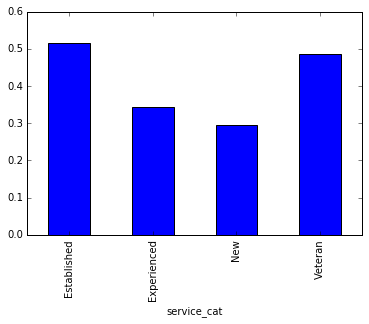

In [94]:
combined_updated.pivot_table( index = 'service_cat', values = 'dissatisfied').plot(kind = 'bar', legend = False)

Shows that the categories *Established* and *Veteran* are more likely to be leave the company due to dissatisfaction. 